In [18]:
#simple LINEAR REGRESSION
# predict the value of “co2 emissions” from the value of “engine size”

# Importlibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [20]:
#Check missing value

data.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
#confirm NA
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [22]:
#feature selection

data = data[['ENGINESIZE', 'CO2EMISSIONS']]
data.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


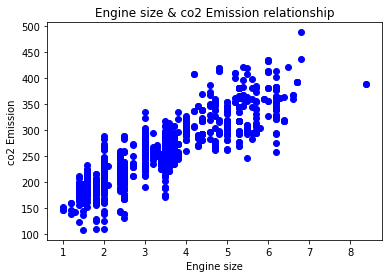

In [28]:
#Regression a relation between input (X) and out variable(y)
#Data visualization
X = data['ENGINESIZE']
y = data['CO2EMISSIONS']

plt.scatter(X, y , color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('co2 Emission')
plt.title('Engine size & co2 Emission relationship')
plt.show()


In [43]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

train
test

,ENGINESIZE,CO2EMISSIONS
853,2.5,202
854,3.5,255
855,2.5,191
856,2.5,198
857,1.8,161
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [32]:
#split data train
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X)
print (y)

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64
0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64


In [63]:
#modelling

regr = linear_model.LinearRegression()
X_train = np.array(train[['ENGINESIZE']])
y_train = np.array(train[['CO2EMISSIONS']])
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
from sklearn.metrics import r2_score

X_test = np.array(test[['ENGINESIZE']])
y_test = np.array(test[['CO2EMISSIONS']])

y_pred = regr.predict(X_test)

In [56]:
#intercept & slope

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_)


Intercept:  [127.16989951]
Coefficient:  [[38.79512384]]


Text(0, 0.5, 'Emission')

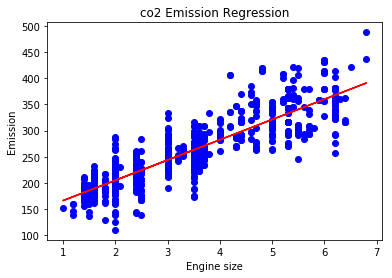

In [64]:
# Plot regression

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
plt.plot(X_train, regr.coef_ * X_train + regr.intercept_, color='red')
plt.title('co2 Emission Regression')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [59]:
# Future car prediction

def get_regression_predictions(input_features, intercept, slope):
    
 predicted_values = input_features*slope + intercept
 return predicted_values

Camry_engine = 2.2
estimatd_emission = get_regression_predictions(Camry_engine, regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission : ', estimatd_emission)

Estimated Emission :  212.51917194814376


In [61]:
print("Skewness: %f" % data['CO2EMISSIONS'].skew())
print("Kurtosis: %f" % data['CO2EMISSIONS'].kurt())

Skewness: 0.519515
Kurtosis: -0.109553


In [70]:
#Evaluation

from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  20.602197903009664
Mean Squared Error:  746.4537521463632
Root Mean Squared Error:  27.321305827986393
